In [1]:
# Importing Packages

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from keras import regularizers

import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns 
sns.set_style('darkgrid')

In [2]:
# Directory Path

train_data_dir = 'Data/train/'
test_data_dir = 'Data/test/'

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Getting all the data

train_generator = train_datagen.flow_from_directory(
                  # This is the target directory
                  train_data_dir,
                  # All images will be resized to 240x240
                  target_size = (224, 224),
                  batch_size = 5216,
                  # Since we are planning use to binary crossentropy loss, we need binary labels
                  class_mode = 'binary')
       
test_generator = test_datagen.flow_from_directory(
                  test_data_dir,
                  target_size = (224, 224),
                  batch_size = 624,
                  class_mode = 'binary')

# Creating the datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
# Confirming the shapes and types of the datasets

display(np.shape(train_images))
display(np.shape(train_labels))

display(type(train_images))
display(type(train_labels))

print('-------------')

display(np.shape(test_images))
display(np.shape(test_labels))

display(type(test_images))
display(type(test_labels))

(5216, 224, 224, 3)

(5216,)

numpy.ndarray

numpy.ndarray

-------------


(624, 224, 224, 3)

(624,)

numpy.ndarray

numpy.ndarray

In [4]:
# Defining the Baseline CNN Model

cnn = Sequential()

cnn.add(layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (224, 224, 3)))
cnn.add(layers.MaxPool2D(pool_size = (2, 2)))

cnn.add(layers.Conv2D(128, (3, 3), activation = "relu"))
cnn.add(layers.MaxPool2D(pool_size = (2, 2)))


cnn.add(layers.Conv2D(192, (3, 3), activation="relu"))
cnn.add(layers.MaxPool2D(pool_size = (2, 2)))

cnn.add(layers.Dense(256, activation = 'relu'))
cnn.add(layers.MaxPool2D(pool_size = (2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation = 'relu'))
cnn.add(layers.Dense(1, activation = 'sigmoid'))

2021-11-17 14:09:25.260751: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Compiling the Model

cnn.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['binary_accuracy'])

In [6]:
# Reviewing the model

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 192)       221376    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 192)       0         
_________________________________________________________________
dense (Dense)                (None, 26, 26, 256)       4

In [7]:
# This will stop training when the monitored metric has stopped improving
# This might be more useful when fine tuning a model

early_stopping = EarlyStopping(patience = 15,               
                               monitor = 'binary_accuracy', 
                               restore_best_weights = True) 

# Patience = After 15 epochs with no improvement, training will be stopped
# Monitor = Binary Accuracy is the quantity being monitored for the patience level
# Restoring model weights from the epoch with the best value of the monitored quantity

In [8]:
# Training the Basline CNN and saving its history

results_2 = cnn.fit(train_images, 
                    train_labels,
                    verbose = 2,
                    batch_size = 50, 
                    epochs = 200,
                    validation_data = (test_images, test_labels),
                    callbacks = [early_stopping])

Epoch 1/200


2021-11-17 14:09:25.619287: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


105/105 - 420s - loss: 0.5270 - binary_accuracy: 0.8230 - val_loss: 0.5153 - val_binary_accuracy: 0.8029
Epoch 2/200
105/105 - 446s - loss: 0.2119 - binary_accuracy: 0.9202 - val_loss: 2.3144 - val_binary_accuracy: 0.6971
Epoch 3/200
105/105 - 445s - loss: 0.1375 - binary_accuracy: 0.9536 - val_loss: 1.3175 - val_binary_accuracy: 0.7196
Epoch 4/200
105/105 - 433s - loss: 0.1334 - binary_accuracy: 0.9613 - val_loss: 1.1871 - val_binary_accuracy: 0.7596
Epoch 5/200
105/105 - 436s - loss: 0.0915 - binary_accuracy: 0.9659 - val_loss: 1.7181 - val_binary_accuracy: 0.7356
Epoch 6/200
105/105 - 440s - loss: 0.0698 - binary_accuracy: 0.9749 - val_loss: 1.7075 - val_binary_accuracy: 0.7340
Epoch 7/200
105/105 - 438s - loss: 0.0704 - binary_accuracy: 0.9803 - val_loss: 1.5067 - val_binary_accuracy: 0.7324
Epoch 8/200
105/105 - 427s - loss: 0.1052 - binary_accuracy: 0.9810 - val_loss: 2.9461 - val_binary_accuracy: 0.7420
Epoch 9/200
105/105 - 419s - loss: 0.0626 - binary_accuracy: 0.9810 - val_lo

In [9]:
# Visualizing our Loss/Accuracy Curves, Classification Report, Confusion Matrices and Evaluating the Performance

def visualize_training_results(results, model, test_images, test_labels):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_binary_accuracy'])
    plt.plot(history['binary_accuracy'])
    plt.legend(['val_binary_accuracy', 'binary_accuracy'])
    plt.title('Binary Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
       
    y_hat_test = model.predict(test_images)
    thresh = 0.5
    y_pred = (y_hat_test > thresh).astype(np.int)
    y_true = test_labels.astype(np.int)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '0.5g')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_true, y_pred))
    print('\n')
    print('\n')
    print('Evaluating the Performance')
    print('\n')
    
    test_score = model.evaluate(test_images, test_labels, verbose = 0)
    print(f'Test Loss: {test_score[0]}')
    print(f'Test Accuracy: {test_score[1]}')

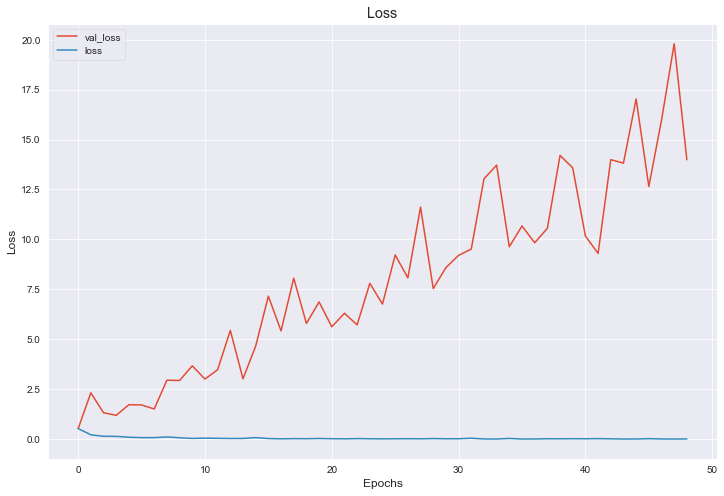

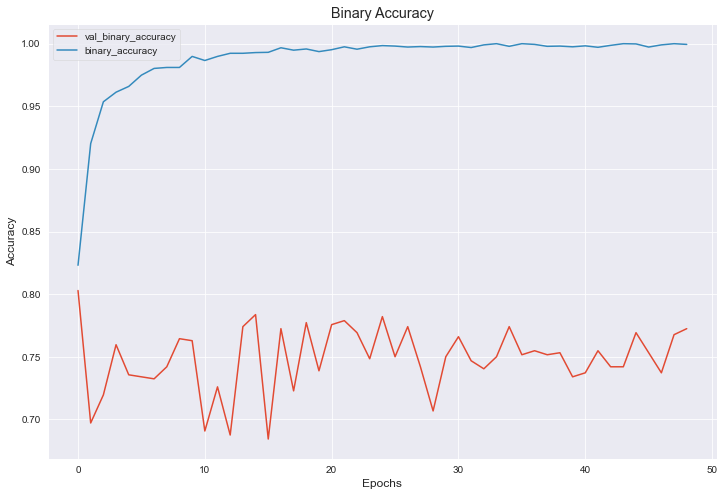

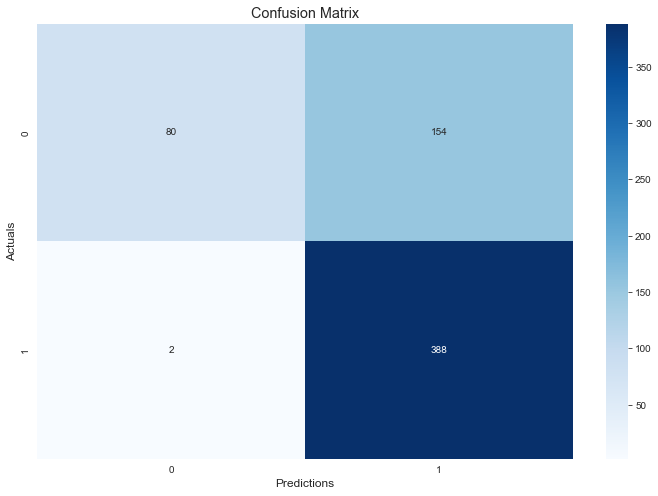

              precision    recall  f1-score   support

           0       0.98      0.34      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.85      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624





Evaluating the Performance


Test Loss: 13.720727920532227
Test Accuracy: 0.75


In [10]:
visualize_training_results(results_2, cnn, test_images, test_labels)

In [12]:
# Saving the Basline CNN Model

cnn.save('baseline_cnn_model.h5')

In [13]:
# Saving the Basline CNN Model Weights

cnn.save_weights('baseline_cnn_model_weights.h5')

# Baseline CNN Model Summary:


* The best accuracy the Baseline CNN model could achieve was about 75%. 


* The confusion matrix shows that it is mostly predicting that there is pneumonia, when pneumonia is actually present in the X-Ray. 


* We can be seen the divergence of the accuracy curves beyond 20 Epochs. The model almost reaches perfection on the training data, while the testing data fails to improve beyond this point. 


* The model is overfitting, quite a bit. 


* This model could be improved/tuned by using differnet activation functions, trying different optimizers, and different degrees of dropouts.  